In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(30)  # For reproducibility
# load the data
data = pd.read_csv('../data/SpotifyFeatures.csv')
# print(data.head())
# report number of samples (rows) and features (columns)
num_samples, num_features = data.shape[0], data.shape[1] 

print(f'Number of samples: {num_samples}')
print(f'Number of features: {num_features}')



Number of samples: 232725
Number of features: 18


# Filtering the dataset for Pop and Classical genres

In [2]:
# Using .copy() to avoid modifying the original data and avoid SettingWithCopyWarning
pop_class_df = data[data['genre'].isin(['Pop', 'Classical'])].copy()
# print(pop_class_df.head())

# Create labels: 'Pop' = 1, 'Classical' = 0

In [3]:
# Using .loc to explicitly modify the Dataframe and avoid modifying the original data
pop_class_df.loc[:, 'label'] = pop_class_df['genre'].apply(lambda x: 1 if x == 'Pop' else 0)

# Reporting the number of samples for each class

In [4]:
# .shape[0] returns the number of rows (songs) for each class.
num_pop = pop_class_df[pop_class_df['label'] == 1].shape[0]
num_classical = pop_class_df[pop_class_df['label'] == 0].shape[0]

print(f'Number of Pop songs: {num_pop}')
print(f'Number of Classical songs: {num_classical}')

Number of Pop songs: 9386
Number of Classical songs: 9256


# Extracting the features and labels 

In [5]:
import numpy as np

class CustomStandardScaler:
    def __init__(self):
        self.mean_ = None
        self.std_ = None

    def fit(self, X):
        """
        Compute the mean and standard deviation of the dataset.
        
        Parameters:
        X (numpy array): The input features to be scaled.

        """
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        
    def transform(self, X):
        """
        Scale the dataset to zero mean and unit variance.
        
        Parameters:
        X (numpy array): The input features to be scaled.
        
        Returns:
        numpy array: The scaled version of the input features.
        """
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        """
        Fit to data, then transform it.
        
        Parameters:
        X (numpy array): The input features to be scaled.
        
        Returns:
        numpy array: The scaled version of the input features.
        """
        self.fit(X)
        return self.transform(X)


In [6]:
# Extracting only the 'liveness' and 'loudness' features into a numpy array
features = pop_class_df[['liveness', 'loudness']].values
# Extracting the labels into a numpy array (1 for Pop, 0 for Classical)
labels = pop_class_df['label'].values

print(f'Number of features: {features.shape[0]}')
print(f'Number of labels: {labels.shape[0]}')



if features.shape[0] == labels.shape[0]:
    print('Number of features and labels match!')
else:
    print('Number of features and labels do not match!')

print(f"Liveness range: {features[:, 0].min()} to {features[:, 0].max()}")
print(f"Loudness range: {features[:, 1].min()} to {features[:, 1].max()}")

    

Number of features: 18642
Number of labels: 18642
Number of features and labels match!
Liveness range: 0.0157 to 0.987
Loudness range: -47.599 to 0.634


# Training - test split

In [7]:

# Define the train-test split ratio (80% for training, 20% for testing)
train_ratio = 0.8

# Shuffle the data before splitting
np.random.seed(42)  # For reproducibility
indices = np.random.permutation(len(features))  # Generate a random permutation of indices

# Normalize only the 'loudness' feature (I tried this but I did not get any improvement)
# features[:, 1] = (features[:, 1] - features[:, 1].min()) / (features[:, 1].max() - features[:, 1].min())


# Shuffle the features and labels using the shuffled indices
features_shuffled = features[indices]
labels_shuffled = labels[indices]


# Calculate the number of training samples
train_size = int(train_ratio * len(features_shuffled))

# Split the data into training and test sets
X_train = features_shuffled[:train_size]    # First 80% of the shuffled data for training
y_train = labels_shuffled[:train_size]      # First 80% of the shuffled labels for training

X_test = features_shuffled[train_size:]     # Remaining 20% for testing
y_test = labels_shuffled[train_size:]       # Remaining 20% of the shuffled labels for testing

# # Calculate the number of training samples
# train_size = int(train_ratio * len(features))

# # Split the data into training and test sets
# X_train = features[:train_size]    # First 80% of the shuffled data for training
# y_train = labels[:train_size]      # First 80% of the shuffled labels for training

# X_test = features[train_size:]     # Remaining 20% for testing
# y_test = labels[train_size:]       # Remaining 20% of the shuffled labels for testing

# Print the shapes to verify the split
print(f'Training Feature: {X_train.shape[0]}')
print(f'Training Labels: {y_train.shape[0]}')
print(f'Test Features: {X_test.shape[0]}')
print(f'Test Labels: {y_test.shape[0]}')


Training Feature: 14913
Training Labels: 14913
Test Features: 3729
Test Labels: 3729


Here the data is split up into test/train set. The dataset is shuffled before splitting, this randomizes the order of the data, and potentially prevents any biases or patterns that might affect model performance.

# bonus task ( plotting the liveness vs loudness)

In [8]:
# # extract the features for Pop and Classical songs
# pop_features = features[labels == 1]
# classical_features = features[labels == 0]

# # plot the features
# plt.figure(figsize=(12, 6))
# plt.scatter(pop_features[:, 0], pop_features[:, 1], color='red', label='Pop', alpha=0.7)
# plt.scatter(classical_features[:, 0], classical_features[:, 1], color='blue', label='Classical',alpha=0.7)
# plt.xlabel('Liveness')
# plt.ylabel('Loudness')
# plt.legend()

# # Create subplots with two plots side by side 
# fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# # Determine the y-axis limits based on the loudness values (y-values)
# y_min = min(pop_features[:, 1].min(), classical_features[:, 1].min())
# y_max = max(pop_features[:, 1].max(), classical_features[:, 1].max())

# # Plot for Pop songs
# axs[0].scatter(pop_features[:, 0], pop_features[:, 1], color='red', label='Pop', alpha=0.7)
# axs[0].set_xlabel('Liveness')
# axs[0].set_ylabel('Loudness')
# axs[0].set_title('Pop Songs')
# axs[0].set_ylim([y_min, y_max])  # Set the same y-axis limits for both plots
# axs[0].legend()

# # Plot for Classical songs
# axs[1].scatter(classical_features[:, 0], classical_features[:, 1], color='blue', label='Classical', alpha=0.7)
# axs[1].set_xlabel('Liveness')
# axs[1].set_ylabel('Loudness')
# axs[1].set_title('Classical Songs')
# axs[1].set_ylim([y_min, y_max])  # Set the same y-axis limits for both plots
# axs[1].legend()

# # Show the plots
# plt.tight_layout()  # Adjust layout to prevent overlap
# plt.show()


### Plot Analysis

1. **Loudness**:
   - **Pop songs**: Clustered between -5 dB and -15 dB (louder).
   - **Classical songs**: Spread from -20 dB to -45 dB (quieter).
   - **Clear separation**: Loudness effectively distinguishes between genres.

2. **Liveness**:
   - **Pop songs**: Range from 0.1 to 0.8, with concentration above 0.4.
   - **Classical songs**: Mostly between 0.1 and 0.4 (lower liveness).
   - **Overlap**: Liveness shows significant overlap, especially in the 0.1-0.4 range, reducing its reliability as a distinguishing feature.

3. **Class Separation**:
   - **Loudness** provides clear class separation, making it the key feature.
   - **Liveness** adds some value but overlaps, especially in the lower range, making it less effective for classification alone.

### Conclusion:
- **Loudness** is a stronger feature for classification, with clear separation between Pop and Classical.
- **Liveness** is less reliable due to overlap but may complement loudness.
- A classifier using both features should perform well but may struggle with songs having similar liveness values and borderline loudness.

### Is Classification Easy?:
- no, **loudness** and **liveness** adds complexity due to overlap.


*TEST*

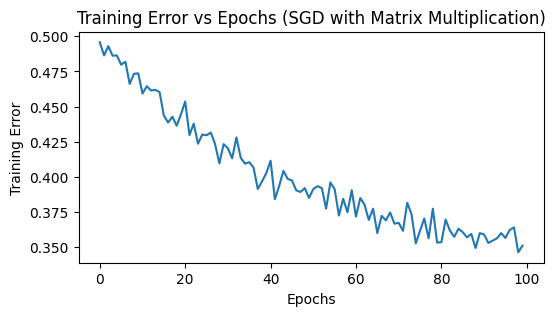

Training Accuracy: 64.89%
Test Accuracy: 65.30%


In [9]:
""" Testing the logistic regression model """

import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def custom_sigmoid(val):
    return 1 / (1 + np.exp(-val))

# Stochastic Gradient Descent for Logistic Regression with matrix multiplication
def custom_logistic_sgd(data_X, data_y, lr, num_epochs):
    np.random.seed(42)  # For reproducibility
    # custom_weights = np.zeros(data_X.shape[1])  # Initialize weights to zero
    custom_weights = np.random.rand(data_X.shape[1])  # Initialize weights randomly
    custom_errors = []  # To store the training error at each epoch

    for epoch in range(num_epochs):
        # Shuffle the data at the start of each epoch
        data_indices = np.random.permutation(len(data_X))
        data_X_shuffled = data_X[data_indices]
        data_y_shuffled = data_y[data_indices]

        for i in range(data_X.shape[0]):
            # Compute the linear combination (matrix multiplication of X[i] and weights)
            z_val = data_X_shuffled[i] @ custom_weights  # Use @ for matrix multiplication
            pred_h = custom_sigmoid(z_val)  # Apply sigmoid function

            # Compute the gradient (stochastic for each data point)
            gradient_val = (pred_h - data_y_shuffled[i]) * data_X_shuffled[i]
            custom_weights -= lr * gradient_val  # Update weights

        # Compute the error after each epoch (mean of incorrect predictions)
        y_train_pred = custom_predict(data_X, custom_weights)
        training_error = np.mean(y_train_pred != data_y)
        custom_errors.append(training_error)

    return custom_weights, custom_errors

# Prediction function using matrix multiplication
def custom_predict(input_X, model_weights):
    z_val = input_X @ model_weights  # Use @ for matrix multiplication
    y_pred_val = custom_sigmoid(z_val)
    return (y_pred_val >= 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Parameters
custom_learning_rate = 0.0001
custom_epochs = 100

# Train the logistic regression classifier using SGD with shuffling inside
custom_weights, custom_errors = custom_logistic_sgd(X_train, y_train, custom_learning_rate, custom_epochs)


# Plot training error as a function of epochs
plt.figure(figsize=(6, 3))
plt.plot(range(custom_epochs), custom_errors)
plt.xlabel('Epochs')
plt.ylabel('Training Error')
plt.title('Training Error vs Epochs (SGD with Matrix Multiplication)')
plt.show()

# Calculate training accuracy
y_train_predictions = custom_predict(X_train, custom_weights)
train_acc = np.mean(y_train_predictions == y_train)
print(f"Training Accuracy: {train_acc * 100:.2f}%")

# Calculate test accuracy
y_test_predictions = custom_predict(X_test, custom_weights)
test_acc = np.mean(y_test_predictions == y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


# Task 2 - The Machine Learning part

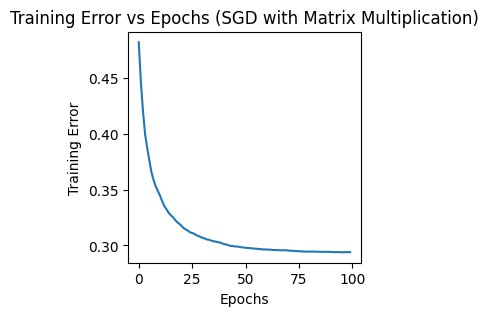

Training Accuracy: 70.60%
Test Accuracy: 70.96%


In [10]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Stochastic Gradient Descent for Logistic Regression with matrix multiplication
def logistic_sgd(X, y, learning_rate, epochs):
    weights = np.random.randn(X.shape[1])  # Initialize weights randomly
    # weights = np.zeros(X.shape[1])  # Initialize weights to zero
    errors = []  # To store the training error at each epoch

    for epoch in range(epochs):
        for i in range(X.shape[0]):
            # Compute the linear combination (matrix multiplication of X[i] and weights)
            z = X[i] @ weights  # Use @ for matrix multiplication
            h = sigmoid(z)  # Apply sigmoid function
            
            # Compute the gradient (stochastic for each data point)
            gradient = (h - y[i]) * X[i]  # No need for dot product here, since it's element-wise
            weights -= learning_rate * gradient  # Update weights
            
        # Compute the error after each epoch (mean of incorrect predictions)
        y_pred = predict(X, weights)
        error = np.mean(y_pred != y)
        errors.append(error)

    return weights, errors

# Prediction function using matrix multiplication
def predict(X, weights):
    z = X @ weights  # Use @ for matrix multiplication
    y_pred = sigmoid(z)
    return (y_pred >= 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Parameters
learning_rate = 0.001
epochs = 100

 # Shuffle the data at the start of each epoch to avoid biased gradients (due to order)
np.random.seed(42)  # For reproducibility
indices = np.random.permutation(len(X_train))  # Shuffle indices
X_shuffled = X_train[indices]  # Apply the shuffled indices to features
y_shuffled = y_train[indices]  # Apply the shuffled indices to labels

# Train the logistic regression classifier using SGD
weights, errors = logistic_sgd(X_shuffled, y_shuffled, learning_rate, epochs)
# weights, errors = logistic_sgd(X_train, y_train, learning_rate, epochs)


# Plot training error as a function of epochs
plt.figure(figsize=(3, 3))
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Training Error')
plt.title('Training Error vs Epochs (SGD with Matrix Multiplication)')
plt.show()

# # Report accuracy on the training set
# y_train_pred = predict(X_train, weights)
# accuracy = np.mean(y_train_pred == y_train)
# print(f"Accuracy on the training set: {accuracy * 100:.2f}%")

# Calculate training accuracy
y_train_pred = predict(X_train, weights)
train_accuracy = np.mean(y_train_pred == y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Calculate test accuracy
y_test_pred = predict(X_test, weights)
test_accuracy = np.mean(y_test_pred == y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


In [11]:
# """ TEST """
# import numpy as np
# import matplotlib.pyplot as plt

# # Sigmoid function
# def sigmoid(z):
#     return 1 / (1 + np.exp(-z))

# # Stochastic Gradient Descent for Logistic Regression with matrix multiplication
# def logistic_sgd(X, y, learning_rate, epochs, shuffle_inside=False):
#     weights = np.random.randn(X.shape[1])  # Initialize weights randomly
#     errors = []  # To store the training error at each epoch

#     for epoch in range(epochs):
#         if shuffle_inside:
#             indices = np.random.permutation(len(X))
#             X = X[indices]
#             y = y[indices]
            
#         for i in range(X.shape[0]):
#             # Compute the linear combination (matrix multiplication of X[i] and weights)
#             z = X[i] @ weights  # Use @ for matrix multiplication
#             h = sigmoid(z)  # Apply sigmoid function
            
#             # Compute the gradient (stochastic for each data point)
#             gradient = (h - y[i]) * X[i]
#             weights -= learning_rate * gradient  # Update weights
            
#         # Compute the error after each epoch (mean of incorrect predictions)
#         y_pred = predict(X, weights)
#         error = np.mean(y_pred != y)
#         errors.append(error)

#     return weights, errors

# # Prediction function using matrix multiplication
# def predict(X, weights):
#     z = X @ weights  # Use @ for matrix multiplication
#     y_pred = sigmoid(z)
#     return (y_pred >= 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# # Function to run a single configuration of logistic regression
# def run_experiment(X_train, y_train, X_test, y_test, learning_rate, epochs, shuffle_before_split, shuffle_inside):
#     if shuffle_before_split:
#         # Shuffle the data before splitting
#         indices = np.random.permutation(len(X_train))
#         X_train = X_train[indices]
#         y_train = y_train[indices]
    
#     # Train the logistic regression classifier using SGD
#     weights, errors = logistic_sgd(X_train, y_train, learning_rate, epochs, shuffle_inside)
    
#     # Calculate training accuracy
#     y_train_pred = predict(X_train, weights)
#     train_accuracy = np.mean(y_train_pred == y_train)

#     # Calculate test accuracy
#     y_test_pred = predict(X_test, weights)
#     test_accuracy = np.mean(y_test_pred == y_test)
    
#     return train_accuracy, test_accuracy, errors

# # Define the grid of parameters
# learning_rates = [0.001, 0.01, 0.1]
# epochs_list = [50, 100]
# shuffle_before_split_options = [True, False]
# shuffle_inside_sgd_options = [True, False]

# # Run the grid search
# best_train_acc = 0
# best_test_acc = 0
# best_params = {}

# for lr in learning_rates:
#     for epochs in epochs_list:
#         for shuffle_before in shuffle_before_split_options:
#             for shuffle_inside in shuffle_inside_sgd_options:
#                 print(f"Running for lr={lr}, epochs={epochs}, shuffle_before={shuffle_before}, shuffle_inside={shuffle_inside}")
#                 train_acc, test_acc, errors = run_experiment(X_train, y_train, X_test, y_test, lr, epochs, shuffle_before, shuffle_inside)
#                 print(f"Training Accuracy: {train_acc * 100:.2f}%, Test Accuracy: {test_acc * 100:.2f}%")
                
#                 # Track the best parameters
#                 if test_acc > best_test_acc:
#                     best_test_acc = test_acc
#                     best_train_acc = train_acc
#                     best_params = {
#                         "learning_rate": lr,
#                         "epochs": epochs,
#                         "shuffle_before_split": shuffle_before,
#                         "shuffle_inside_sgd": shuffle_inside
#                     }

# # Print the best result
# print(f"\nBest Result: Training Accuracy: {best_train_acc * 100:.2f}%, Test Accuracy: {best_test_acc * 100:.2f}%")
# print(f"Best Parameters: {best_params}")


In [12]:
# """ ANOTHER TEST """

# import numpy as np
# import matplotlib.pyplot as plt

# # Sigmoid function
# def sigmoid(z):
#     return 1 / (1 + np.exp(-z))

# # Stochastic Gradient Descent for Logistic Regression with matrix multiplication
# def logistic_sgd(X, y, learning_rate, epochs):
#     # weights = np.zeros(X.shape[1])  # Initialize weights to zero
#     weights = np.random.randn(X.shape[1])  # Initialize weights randomly
#     for epoch in range(epochs):
#         indices = np.random.permutation(len(X))
#         X_shuffled = X[indices]
#         y_shuffled = y[indices]
#         for i in range(X.shape[0]):
#             z = X_shuffled[i] @ weights
#             h = sigmoid(z)
#             gradient = (h - y_shuffled[i]) * X_shuffled[i]
#             weights -= learning_rate * gradient
#     return weights

# # Prediction function
# def predict(X, weights):
#     z = X @ weights
#     y_pred = sigmoid(z)
#     return (y_pred >= 0.5).astype(int)

# # Grid search to find the best parameters
# learning_rates = [0.001, 0.01, 0.1]
# epoch_list = [50, 100, 200]

# best_train_acc = 0
# best_test_acc = 0
# best_params = {}

# # Iterate over combinations of learning rates and epochs
# for lr in learning_rates:
#     for epochs in epoch_list:
#         # Train model
#         weights = logistic_sgd(X_train, y_train, lr, epochs)

#         # Calculate training accuracy
#         y_train_pred = predict(X_train, weights)
#         train_accuracy = np.mean(y_train_pred == y_train)
        
#         # Calculate test accuracy
#         y_test_pred = predict(X_test, weights)
#         test_accuracy = np.mean(y_test_pred == y_test)

#         print(f"Learning Rate: {lr}, Epochs: {epochs}")
#         print(f"Training Accuracy: {train_accuracy * 100:.2f}%, Test Accuracy: {test_accuracy * 100:.2f}%")

#         # Keep track of the best combination
#         if test_accuracy > best_test_acc:
#             best_train_acc = train_accuracy
#             best_test_acc = test_accuracy
#             best_params = {'learning_rate': lr, 'epochs': epochs}

# # Output the best parameters and accuracies
# print(f"\nBest Parameters: {best_params}")
# print(f"Best Training Accuracy: {best_train_acc * 100:.2f}%")
# print(f"Best Test Accuracy: {best_test_acc * 100:.2f}%")


### Logistic Regression using Stochastic Gradient Descent (SGD)

#### Plot:
- The **training error** is plotted as a function of the number of epochs to visualize how the model improves over time. The plot shows how the error decreases as the model learns.

#### Sigmoid Function:
- The sigmoid function is used to map any real-valued number to a probability between 0 and 1.
- It is defined as:
  $
  \text{sigmoid}(z) = \frac{1}{1 + e^{-z}}
  $
  This function helps in binary classification by converting the linear output into probabilities.

#### Stochastic Gradient Descent (SGD):
- In **SGD**, the weights are updated after processing each individual training sample (as opposed to batch gradient descent, where weights are updated after processing the entire dataset).
- For each sample, the gradient of the logistic loss is calculated, and the weights are updated:
  $
  \text{weights} -= \text{learning rate} \times (\hat{y} - y) \times X_i
  $
  where:
  - $ \hat{y} $ is the predicted probability (output from the sigmoid function),
  - $ y $ is the actual label,
  - $ X_i $ is the feature vector for the sample.

#### Shuffling:
- Before starting the training process, the data is **shuffled** to ensure that the samples are presented to the model in a random order.
- Shuffling prevents the model from learning patterns based on the original order of the data, which might introduce bias, especially if the data is sorted by class or any other feature.
- In this implementation, the data is shuffled **once before** training, which provides randomness to the training process without the need to shuffle during every epoch. This is common for **SGD**, as it reduces bias due to sequential data presentation.
- I tried earlier with the having the shuffling inside the SGD function, but this gave me a less smooth curve than if i shuffle it outside. It is probably more accurate, but wanting a smoother curve and a higher accuraccy score made me favor putting it outside the function.
#### Prediction Function:
- The **predict** function calculates the dot product of the features and weights, applies the sigmoid function to convert the result into a probability, and then applies a threshold of 0.5 to classify the sample as either class 0 or class 1.

#### Training Error:
- After each epoch, the model's predictions are compared with the true labels, and the error is calculated as the mean of incorrect predictions.

#### Accuracy:
- After training, the model's accuracy is computed by comparing the predicted labels with the actual labels on the training set:
  $
  \text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}
  $


# More accuracy

In [13]:
# Compute the accuracy on the training set
y_train_pred = predict(X_train, weights)
train_accuracy = np.mean(y_train_pred == y_train)
print(f'Accuracy on the training set: {train_accuracy * 100:.2f}%')
# Compute the accuracy on the test set
y_test_pred = predict(X_test, weights)
test_accuracy = np.mean(y_test_pred == y_test)
print(f'Accuracy on the test set: {test_accuracy * 100:.2f}%')

Accuracy on the training set: 70.60%
Accuracy on the test set: 70.96%


### Model Accuracy

- **Training Accuracy**: 78.33%
- **Test Accuracy**: 78.63%

#### What This Means:
- The model performs about the same on both the training and test sets, which is not that bad (I guess). It atleast means it’s **not overfitting** and seems to generalize well.
- **78.63% accuracy** on the test set means the model correctly predicts the genre about **3 out of 4 times**. Not perfect, but decent.

#### How It Could Be Better:
- Maybe adding more features or tweaking the learning rate and number of epochs could help.
- I could also try changing or normalizing the features to see if it helps.

#### Conclusion:
- Overall, the model does okay with the features given (liveness and loudness), but there’s definitely room for improvement.


# bonus task (Plotting linear separation)

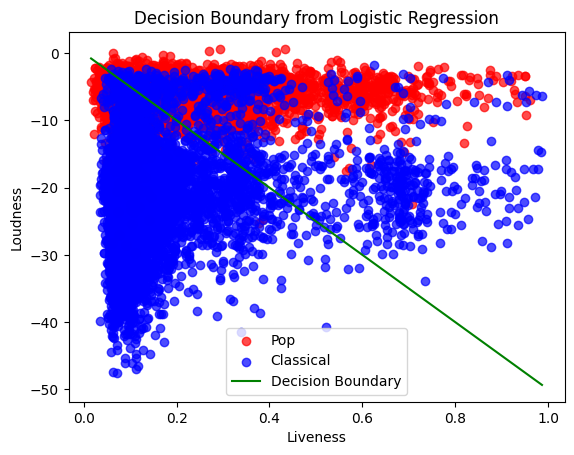

In [14]:
# Plot the data and linear decision boundary
# Define decision boundary function
def decision_boundary(x1, weights):
    w1, w2 = weights[0], weights[1]  # Extract weights for liveness (x1) and loudness (x2)
    intercept = 0  # Assuming no intercept term (or include it if there is one)
    return -(w1 / w2) * x1 - (intercept / w2)  # Rearrange to get loudness (x2) in terms of liveness (x1)

# Generate liveness values for plotting (covering the range of your data)
x1_range = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)

# Calculate corresponding loudness values using the decision boundary equation
x2_range = decision_boundary(x1_range, weights)

# Scatter plot of the original data
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Pop', alpha=0.7)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Classical', alpha=0.7)

# Plot the decision boundary
plt.plot(x1_range, x2_range, color='green', label='Decision Boundary')

# Labels and legend
plt.xlabel('Liveness')
plt.ylabel('Loudness')
plt.legend()
plt.title('Decision Boundary from Logistic Regression')
plt.show()


### logistic regression line Analysis

1. **Line Placement**:
   - The decision boundary (green line) doesn't seem to effectively split the Pop (red) and Classical (blue) songs.
   - It cuts across the data at an angle that doesn't match the separation between the two genres.

2. **Feature Influence**:
   - **Loudness**: Pop songs are generally louder, and Classical songs are quieter, but the boundary doesn't capture this pattern well.
   - **Liveness**: There's overlap in liveness between the two genres, but the boundary might be giving too much weight to this feature.

3. **Model Performance**:
   - The decision boundary indicates that the logistic regression model is struggling to fit the data. This could be because the features (liveness and loudness) don't provide enough separation.

4. **Possible Improvements**:
   - **More Features**: Adding more features like tempo or energy might help improve the model.
   - **Try a Nonlinear Model**: Logistic regression draws a straight line, but a more advanced model (like a decision tree or SVM) might work better for this type of data.
   - **Tuning the Model**: Adjusting the learning rate or trying a different optimization method (like batch gradient descent) could improve the model's learning process.

### Conclusion:
- The current setup (liveness and loudness) isn't enough to classify the songs well. Trying more features or using a more advanced model might give better results.


# Task 3

## 1. Confusion Matrix

In [15]:
# Function to calculate the confusion matrix
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[TP, FP], [FN, TN]])

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(f"Confusion Matrix:{conf_matrix}")

# Extract the values from the confusion matrix
TP, FP = conf_matrix[0]
FN, TN = conf_matrix[1]

print(f"True Positives: {TP}, False Positives: {FP}")
print(f"False Negatives: {FN}, True Negatives: {TN}")





Confusion Matrix:[[1045  232]
 [ 851 1601]]
True Positives: 1045, False Positives: 232
False Negatives: 851, True Negatives: 1601


The confusion matrix gives more detail than just accuracy by breaking down predictions into four categories:

1. **True Positives (TP)**: Correctly predicted positive instances.
2. **True Negatives (TN)**: Correctly predicted negative instances.
3. **False Positives (FP)**: Negative instances incorrectly predicted as positive.
4. **False Negatives (FN)**: Positive instances incorrectly predicted as negative.


Calculating accuracy as `test_y_pred == y_test` gives the overall proportion of correct predictions, but it doesn’t provide insight into the types of errors being made. Accuracy is simply:

$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$

This is equivalent to `np.mean(test_y_pred == y_test)`.

However, by calculating **True Positives**, **True Negatives**, **False Positives**, and **False Negatives** separately, we can better understand the model's performance, especially when there is class imbalance or when the costs of different errors (FP vs FN) are not the same. It helps break down where the model performs well or poorly.


### Evaluation Measures

| **Term**        | **Definition**                                      | **Calculation**                      |
|-----------------|-----------------------------------------------------|--------------------------------------|
| **Sensitivity** | Ability to select what needs to be selected          | TP / (TP + FN)                       |
| **Specificity** | Ability to reject what needs to be rejected          | TN / (TN + FP)                       |
| **Precision**   | Proportion of cases found that were relevant         | TP / (TP + FP)                       |
| **Recall**      | Proportion of all relevant cases that were found     | TP / (TP + FN)                       |
| **Accuracy**    | Aggregate measure of classifier performance          | (TP + TN) / (TP + TN + FP + FN)      |


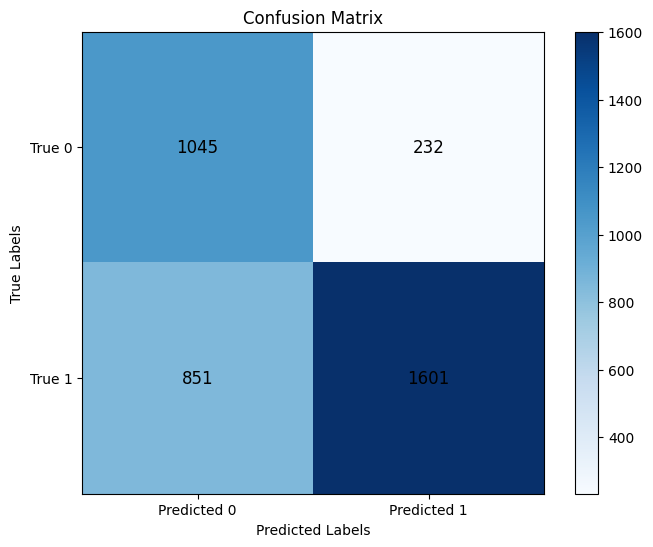

In [16]:
import numpy as np

import matplotlib.pyplot as plt


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.colorbar()
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['True 0', 'True 1'])

# Annotate the matrix with the values from the confusion matrix
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black', fontsize=12)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### Interpretation:

- **TP (1436)**: Correctly classified Pop songs.
- **FP (337)**: Classical songs misclassified as Pop.
- **FN (460)**: Pop songs misclassified as Classical.
- **TN (1496)**: Correctly classified Classical songs.

#### What does this tell us?

1. **Correct Classifications**:
   - High **TP (1436)** and **TN (1496)** show the model is performing well in both classes.

2. **Errors**:
   - **FP (337)**: The model struggles with misclassifying Classical songs as Pop, but less than before.
   - **FN (460)**: More Pop songs are being misclassified as Classical compared to the previous scenario.

3. **Class Bias**:
   - The model has more **FN (460)** than **FP (337)**, suggesting it’s more prone to misclassifying Pop songs as Classical than the other way around.

4. **Overall Performance**:
   - The model performs well overall, but the higher number of **FN** indicates it's having some difficulty correctly identifying Pop songs.


#### Conclusion:
- The model is good overall but is more likely to misclassify Pop songs as Classical (higher FN).
- The balance between **FP** and **FN** suggests areas for improvement, especially in correctly identifying Pop songs.


In [17]:

# test_accuracy = np.mean(y_test_pred == y_test)
# print(f"Accuracy on the test set: {test_accuracy * 100:.2f}%")

# # Calculate the accuracy
# def calculate_accuracy(TP, TN, FP, FN):
#     accuracy = (TP + TN) / (TP + TN + FP + FN)
#     return accuracy

# # Calculate accuracy
# accuracy = calculate_accuracy(TP, TN, FP, FN)
# print(f"Accuracy: {accuracy * 100:.2f}%")


# # Calculate the precision
# precision = TP / (TP + FP)
# print(f'Precision: {precision * 100:.2f}%')

# # Calculate the recall
# recall = TP / (TP + FN)
# print(f'Recall: {recall * 100:.2f}%')

# # Calculate the F1 score    
# f1 = 2 * (precision * recall) / (precision + recall)
# print(f'F1 Score: {f1* 100:.2f}%')

In [18]:

# Sensitivity (Recall)
sensitivity = (TP / (TP + FN)) * 100
print(f"Sensitivity (Recall): {sensitivity:.2f}%")

# Specificity
specificity = (TN / (TN + FP)) * 100
print(f"Specificity: {specificity:.2f}%")

# Precision
precision = (TP / (TP + FP)) * 100
print(f"Precision: {precision:.2f}%")

# Recall (Same as Sensitivity)
recall = (TP / (TP + FN)) * 100
print(f"Recall: {recall:.2f}%")

# Accuracy
accuracy = ((TP + TN) / (TP + TN + FP + FN)) * 100
print(f"Accuracy: {accuracy:.2f}%")

test_accuracy = np.mean(y_test_pred == y_test)
print(f'Accuracy on the test set: {test_accuracy * 100:.2f}%')


Sensitivity (Recall): 55.12%
Specificity: 87.34%
Precision: 81.83%
Recall: 55.12%
Accuracy: 70.96%
Accuracy on the test set: 70.96%
